### WeatherPy 

#### Creating Latitude and Longitude Combinations

In [3]:
# Let's apply our new knowledge to this project. 
# Import the Pandas, Matplotlib, and NumPy dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
   

In [4]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)
coordinates


In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:    
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [6]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)
# List for holding lat_lngs and cities
lat_longs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(long_range[0], long_range[1], size=1500)
lat_longs = zip(lats, longs)
# Identify nearest city for each lat, lng combination
for lat_long in lat_longs:
   city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
   # If the city is unique, then add it to a our cities list
   if city not in cities:
       cities.append(city)
# Print the city count to confirm sufficient count
len(cities)



643

In [7]:
# Module 6.2.2

# We will need to do the following:

# Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
# City, country, and date
# Latitude and longitude
# Maximum temperature
# Humidity
# Cloudiness
# Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.


In [8]:
# Import your Requests Library and the weather_api_key.
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
#(we worked on this URL and the API key in API_practice.ipynb file where @@@@@ API @@@@@ has been typed)
# Import the API key.
#from config import weather_api_key


# Import the datetime module from the datetime library.
from datetime import datetime
# import requests
# import time


In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 13 | coquimbo
Processing Record 2 of Set 13 | hermanus
Processing Record 3 of Set 13 | vari
Processing Record 4 of Set 13 | nelson bay
Processing Record 5 of Set 13 | tuktoyaktuk
Processing Record 6 of Set 13 | busselton
Processing Record 7 of Set 13 | sakaiminato
Processing Record 8 of Set 13 | cabo san lucas
Processing Record 9 of Set 13 | nouadhibou
Processing Record 10 of Set 13 | ginda
Processing Record 11 of Set 13 | rikitea
Processing Record 12 of Set 13 | bunol
Processing Record 13 of Set 13 | malinovskiy
Processing Record 14 of Set 13 | victoria
Processing Record 15 of Set 13 | punta arenas
Processing Record 16 of Set 13 | dicabisagan
Processing Record 17 of Set 13 | necochea
Processing Record 18 of Set 13 | ust-nera
Processing Record 19 of Set 13 | marcona
Processing Record 20 of Set 13 | sept-iles
Processing Record 21 of Set 13 | mataura
Processing Record 22 of Set 13 | yellowknife
Processing Record 23 of Set 13 | masty
Processing Record 24 of Set 

In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
### Let's add a try-except block to our code

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 44 of Set 25 | coquimbo
Processing Record 45 of Set 25 | hermanus
Processing Record 46 of Set 25 | vari
Processing Record 47 of Set 25 | nelson bay
Processing Record 48 of Set 25 | tuktoyaktuk
Processing Record 49 of Set 25 | busselton
Processing Record 50 of Set 25 | sakaiminato
Processing Record 51 of Set 25 | cabo san lucas
Processing Record 52 of Set 25 | nouadhibou
Processing Record 53 of Set 25 | ginda
Processing Record 54 of Set 25 | rikitea
Processing Record 55 of Set 25 | bunol
Processing Record 56 of Set 25 | malinovskiy
Processing Record 57 of Set 25 | victoria
Processing Record 58 of Set 25 | punta arenas
Processing Record 59 of Set 25 | dicabisagan
Processing Record 60 of Set 25 | necochea
Processing Record 61 of Set 25 | ust-nera
Processing Record 62 of Set 25 | marcona
City not found. Skipping...
Processing Record 63 of Set 25 | sept-iles
Processing Record 64 of Set 25 | mataura
Processing Record 65 of Set 25 | yellowknife
Processing Record 66 of Set 25

Processing Record 37 of Set 28 | zhigansk
Processing Record 38 of Set 28 | makushino
Processing Record 39 of Set 28 | warud
Processing Record 40 of Set 28 | flinders
Processing Record 41 of Set 28 | esna
Processing Record 42 of Set 28 | port alfred
Processing Record 43 of Set 28 | ha tinh
Processing Record 44 of Set 28 | sorland
Processing Record 45 of Set 28 | saleaula
City not found. Skipping...
Processing Record 46 of Set 28 | eureka
Processing Record 47 of Set 28 | beringovskiy
Processing Record 48 of Set 28 | fairbanks
Processing Record 49 of Set 28 | takoradi
Processing Record 50 of Set 28 | tiksi
Processing Record 1 of Set 29 | morant bay
Processing Record 2 of Set 29 | cayenne
Processing Record 3 of Set 29 | avera
Processing Record 4 of Set 29 | port hardy
Processing Record 5 of Set 29 | bairiki
Processing Record 6 of Set 29 | avarua
Processing Record 7 of Set 29 | aykhal
Processing Record 8 of Set 29 | vardo
Processing Record 9 of Set 29 | batagay-alyta
Processing Record 10 of

Processing Record 21 of Set 32 | ust-kuyga
Processing Record 22 of Set 32 | adiake
Processing Record 23 of Set 32 | labutta
City not found. Skipping...
Processing Record 24 of Set 32 | mehran
Processing Record 25 of Set 32 | iquitos
Processing Record 26 of Set 32 | damaturu
Processing Record 27 of Set 32 | alta floresta
Processing Record 28 of Set 32 | ocosingo
Processing Record 29 of Set 32 | xingcheng
Processing Record 30 of Set 32 | kem
Processing Record 31 of Set 32 | havoysund
Processing Record 32 of Set 32 | luancheng
Processing Record 33 of Set 32 | kenora
Processing Record 34 of Set 32 | cairns
Processing Record 35 of Set 32 | ozernovskiy
Processing Record 36 of Set 32 | trinidad
Processing Record 37 of Set 32 | viedma
Processing Record 38 of Set 32 | srednekolymsk
Processing Record 39 of Set 32 | tir pol
City not found. Skipping...
Processing Record 40 of Set 32 | puerto escondido
Processing Record 41 of Set 32 | nemuro
Processing Record 42 of Set 32 | irvine
Processing Record

Processing Record 8 of Set 36 | mahenge
Processing Record 9 of Set 36 | pag
Processing Record 10 of Set 36 | sur
Processing Record 11 of Set 36 | kamuli
Processing Record 12 of Set 36 | aquiraz
Processing Record 13 of Set 36 | verkhoyansk
Processing Record 14 of Set 36 | olafsvik
Processing Record 15 of Set 36 | umm kaddadah
Processing Record 16 of Set 36 | lamar
Processing Record 17 of Set 36 | puquio
Processing Record 18 of Set 36 | chongwe
Processing Record 19 of Set 36 | laurentides
Processing Record 20 of Set 36 | yar-sale
Processing Record 21 of Set 36 | agirish
Processing Record 22 of Set 36 | santo anastacio
Processing Record 23 of Set 36 | havelock
Processing Record 24 of Set 36 | nova olinda do norte
Processing Record 25 of Set 36 | khash
Processing Record 26 of Set 36 | paka
Processing Record 27 of Set 36 | itapirapua
Processing Record 28 of Set 36 | nuuk
Processing Record 29 of Set 36 | russell
Processing Record 30 of Set 36 | qarqin
Processing Record 31 of Set 36 | chunoya

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coquimbo,-29.9533,-71.3436,56.93,94,90,3.60,CL,2021-06-04 01:22:14
1,Hermanus,-34.4187,19.2345,52.90,72,96,7.18,ZA,2021-06-04 01:22:15
2,Vari,37.8312,23.8081,69.64,60,24,1.01,GR,2021-06-04 01:22:15
3,Nelson Bay,-32.7167,152.1500,66.99,70,0,4.00,AU,2021-06-04 01:22:16
4,Tuktoyaktuk,69.4541,-133.0374,41.00,81,90,14.97,CA,2021-06-04 01:22:16
5,Busselton,-33.6500,115.3333,53.10,77,68,9.35,AU,2021-06-04 01:17:29
6,Sakaiminato,35.5500,133.2333,66.18,94,75,9.22,JP,2021-06-04 01:22:17
7,Cabo San Lucas,22.8909,-109.9124,91.81,34,1,11.50,MX,2021-06-04 01:20:17
8,Nouadhibou,20.9310,-17.0347,67.98,77,11,20.71,MR,2021-06-04 01:22:18
9,Ginda,30.6945,78.4932,63.18,46,1,6.69,IN,2021-06-04 01:22:18


In [16]:
# Reorder the columns in the order you want them to appear.

new_column_order = ["City", "Country", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign a new or the same DataFrame the new column order.

reordered_df = city_data_df[new_column_order]
reordered_df.head(10)


,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coquimbo,CL,-29.9533,-71.3436,56.93,94,90,3.60
1,Hermanus,ZA,-34.4187,19.2345,52.90,72,96,7.18
2,Vari,GR,37.8312,23.8081,69.64,60,24,1.01
3,Nelson Bay,AU,-32.7167,152.1500,66.99,70,0,4.00
4,Tuktoyaktuk,CA,69.4541,-133.0374,41.00,81,90,14.97
5,Busselton,AU,-33.6500,115.3333,53.10,77,68,9.35
6,Sakaiminato,JP,35.5500,133.2333,66.18,94,75,9.22
7,Cabo San Lucas,MX,22.8909,-109.9124,91.81,34,1,11.50
8,Nouadhibou,MR,20.9310,-17.0347,67.98,77,11,20.71
9,Ginda,IN,30.6945,78.4932,63.18,46,1,6.69


In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

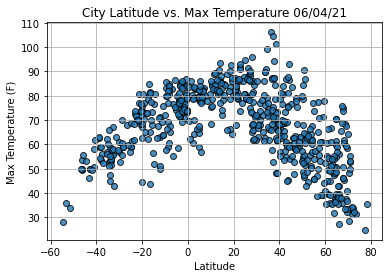

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

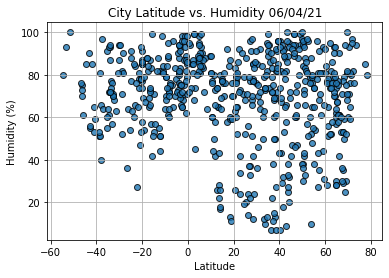

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

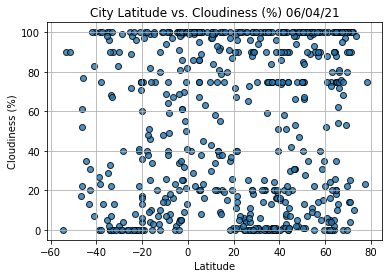

In [20]:
# 6.3.3 Plot Latitude vs. Cloudiness
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

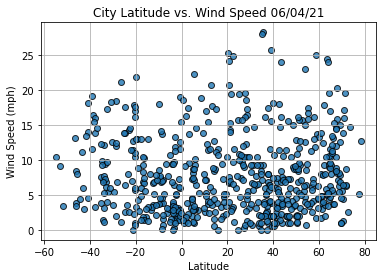

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()